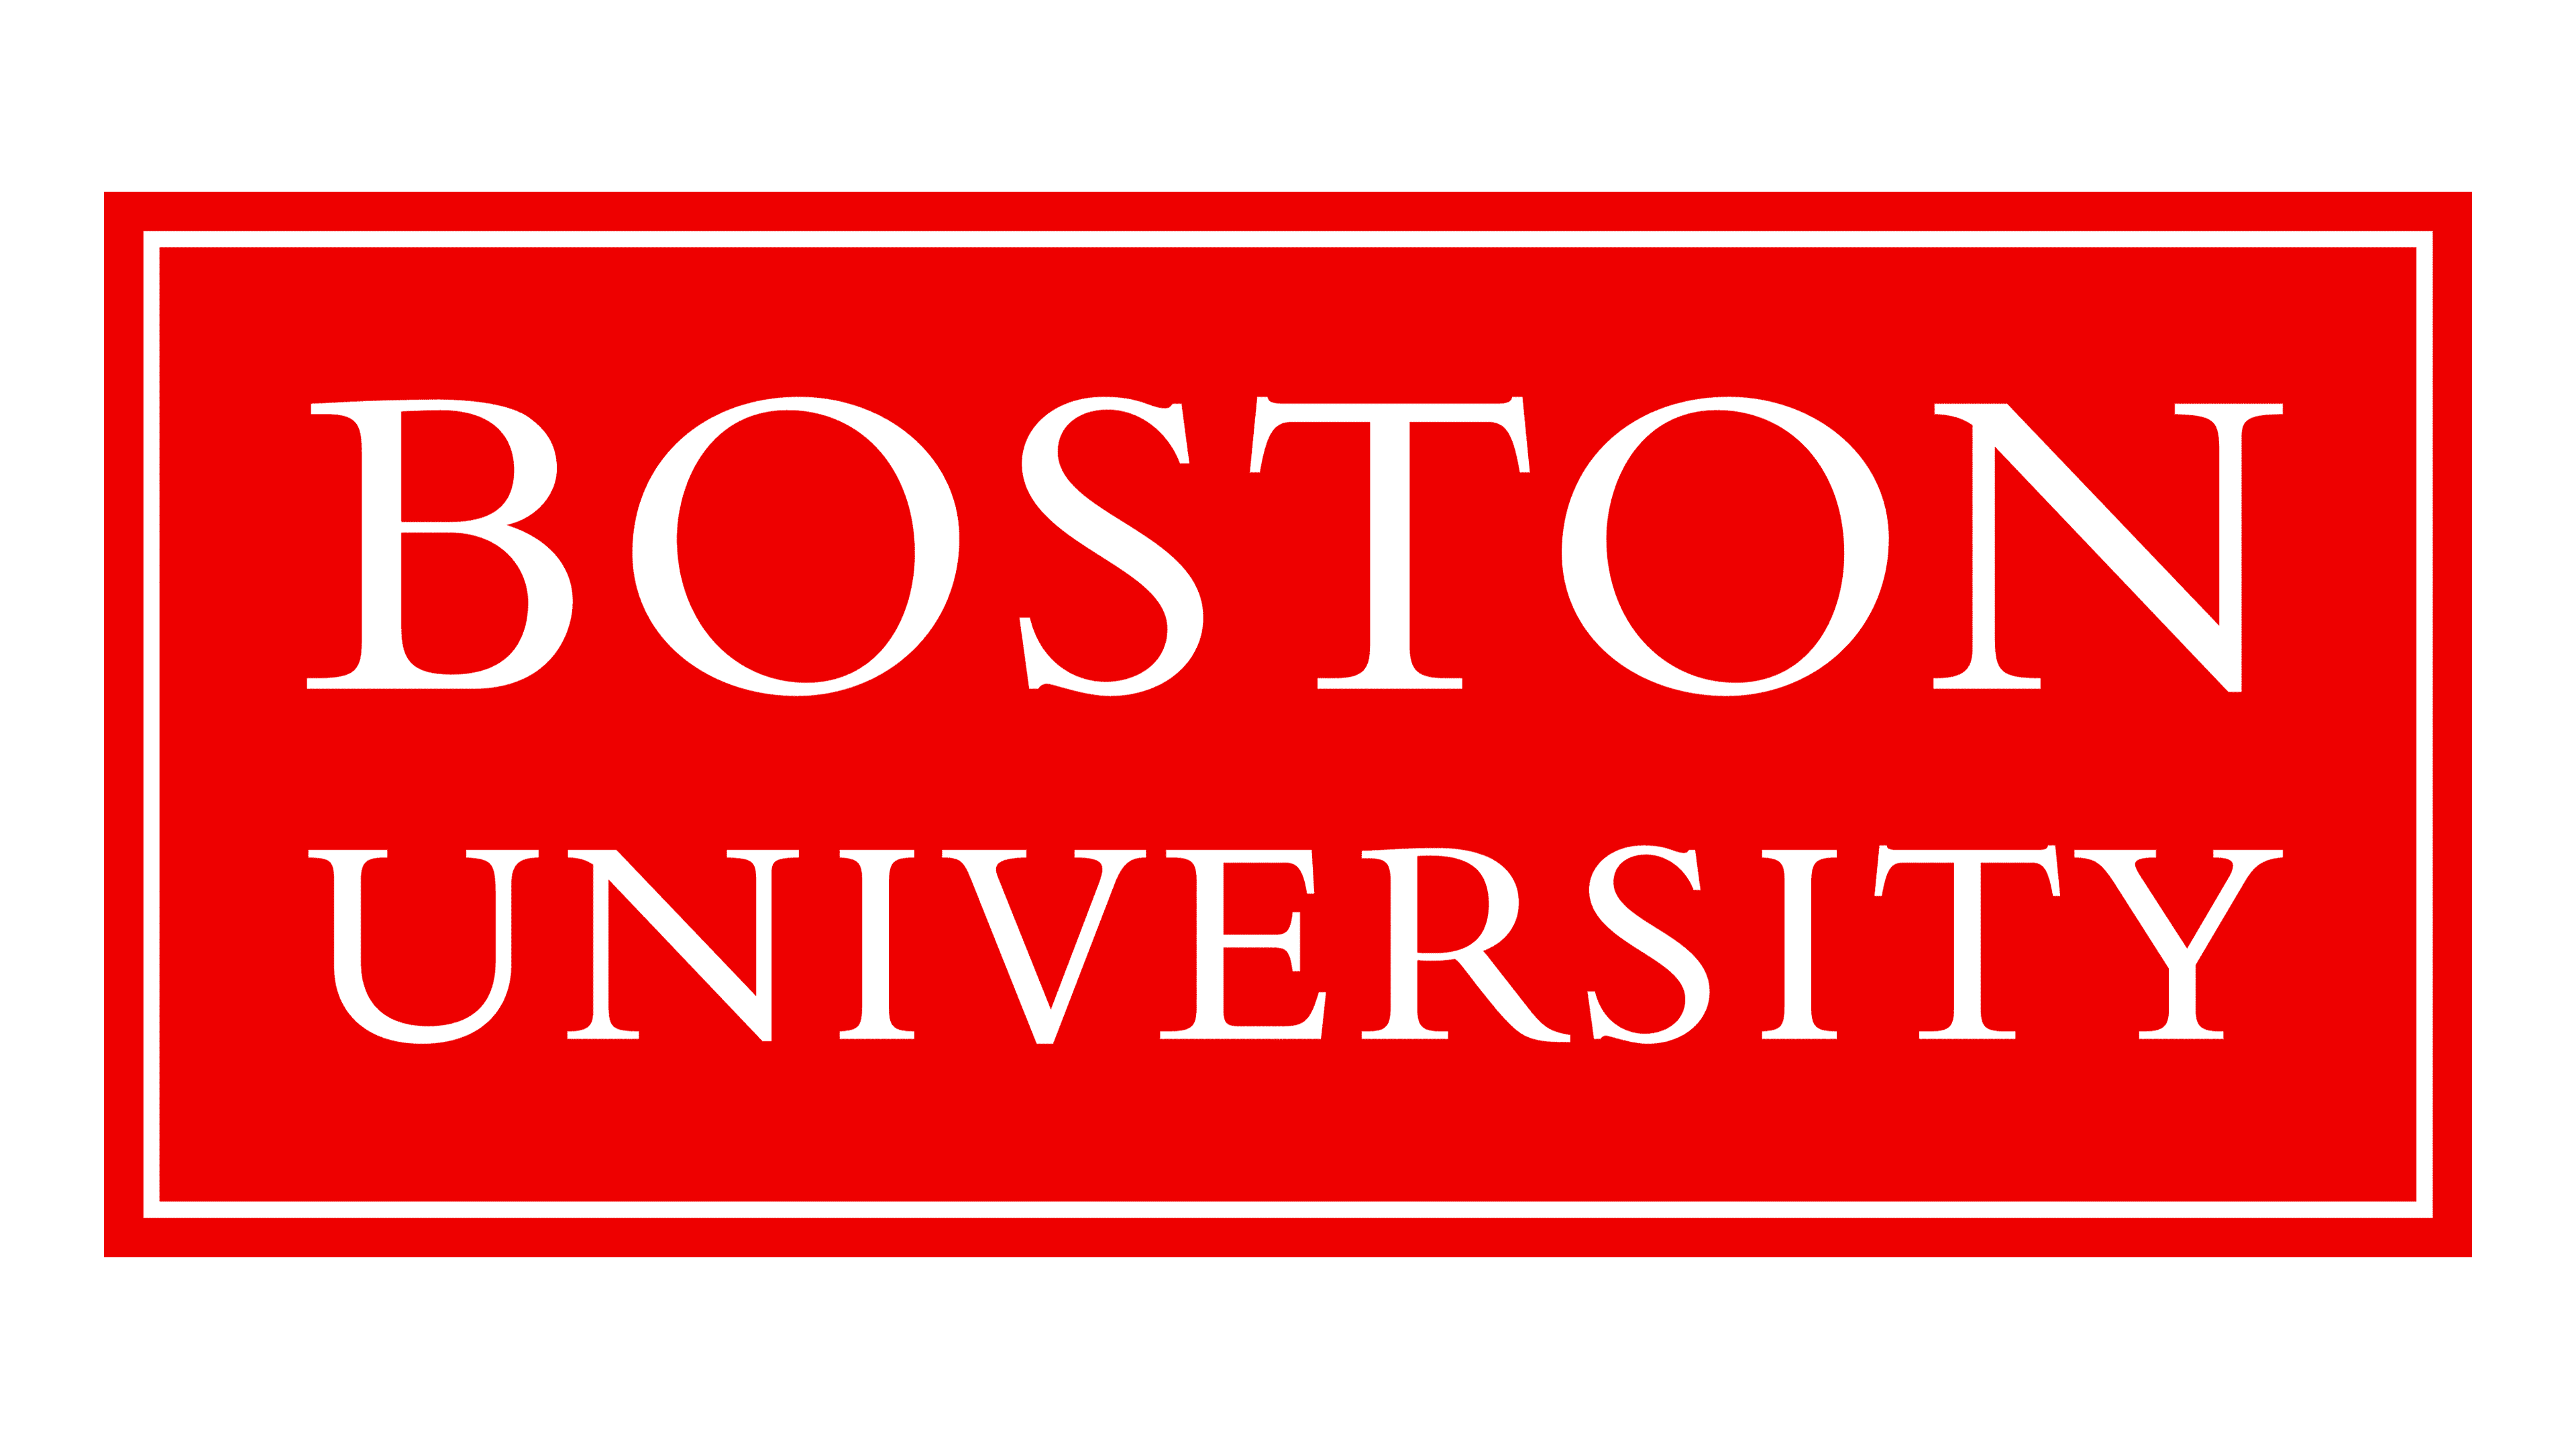


# <div style="text-align: center"> <h2>Final Project</div>

# <div style="text-align: center"> <h4>AD654 A3 Marketing Analytics (Spring 2024)</div>

# <div style="text-align: center"> <h4>Team - Caramel Cold Brew </div>

# <div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra </div>

# Classification

In [1]:
import pandas as pd

### Step - I: Dataset - Discription

In [12]:
df = pd.read_csv("event_visitor.csv")

In [13]:
# Looking at the dataframe
df.head()

,visitorID,age,gender,LL_passholder,homestate,phys_level,travel_dist,occupation,companion_type,social_media,preference
0,1,33,Male,0,Maine,Moderate,49.6,White Collar,Friends,0.86,Interactive
1,2,68,Female,0,Ontario,Very Active,458.7,White Collar,Friends,0.48,Interactive
2,3,41,Female,0,New Jersey,Very Active,357.9,Ret/Unemp/Unk,Friends,0.17,Interactive
3,4,22,Male,0,Maine,Moderate,47.8,Blue Collar,Children,0.21,Interactive
4,5,82,Male,0,Maine,Sedentary,45.9,White Collar,Children,0.77,Passive


> **💡Interpretations💡-**
>
> By looking at the dataframe, we can categorise the variables as follows:
>
>**CATEGORICAL VARIABLES**
>
> Gender, LL_passholder, homestate, phys_level, occupation, companion_type, preference 
>
> **NUMERICAL VARIABLES**
>
> Age, travel_dist, social_media, visitorID

### Step - II: Dealing with Null Values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   visitorID       2400 non-null   int64  
 1   age             2400 non-null   int64  
 2   gender          2400 non-null   object 
 3   LL_passholder   2400 non-null   int64  
 4   homestate       2328 non-null   object 
 5   phys_level      2234 non-null   object 
 6   travel_dist     2400 non-null   float64
 7   occupation      2400 non-null   object 
 8   companion_type  2400 non-null   object 
 9   social_media    2400 non-null   float64
 10  preference      2376 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 206.4+ KB


In [15]:
df.isnull().sum()

visitorID           0
age                 0
gender              0
LL_passholder       0
homestate          72
phys_level        166
travel_dist         0
occupation          0
companion_type      0
social_media        0
preference         24
dtype: int64

In [16]:
df.dropna(subset=["phys_level"], inplace=True)

In [18]:
df["homestate"].fillna("Unknown", inplace=True)

In [20]:
pred_preference = df["preference"].mode()[0]
df["preference"].fillna(pred_preference, inplace = True)

In [21]:
df.isnull().sum()

visitorID         0
age               0
gender            0
LL_passholder     0
homestate         0
phys_level        0
travel_dist       0
occupation        0
companion_type    0
social_media      0
preference        0
dtype: int64

### Step - II: Response Variable

In [22]:
# Response Variable - "preference"
df_preference = df["preference"].value_counts()
df_preference

preference
Interactive    1345
Passive         889
Name: count, dtype: int64

> **💡Interpretation of Result💡-**
>
> The "preference" variable has two outocme classes: "Interactive" and "Passive"
> The output shows the number of visitors who prefer interactive or passive events. There are 1427 visitors who prefer interactive events and 949 visitors who prefer passive events.
>
>In other words, a little bit more than 60% of the visitors prefer interactive events.

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["preference"] = label_encoder.fit_transform(df["preference"])
print(df["preference"]. value_counts())

preference
0    1345
1     889
Name: count, dtype: int64


### Step - III: Correlation

In [68]:
df

,visitorID,age,gender,LL_passholder,homestate,phys_level,travel_dist,occupation,companion_type,social_media,preference
0,1,33,Male,0,Maine,Moderate,49.6,White Collar,Friends,0.86,0
1,2,68,Female,0,Ontario,Very Active,458.7,White Collar,Friends,0.48,0
2,3,41,Female,0,New Jersey,Very Active,357.9,Ret/Unemp/Unk,Friends,0.17,0
3,4,22,Male,0,Maine,Moderate,47.8,Blue Collar,Children,0.21,0
4,5,82,Male,0,Maine,Sedentary,45.9,White Collar,Children,0.77,1
...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,75,Female,0,New Jersey,Moderate,340.9,White Collar,Solo,0.27,0
2396,2397,58,Female,0,New York,Moderate,329.7,White Collar,Friends,0.17,1
2397,2398,46,Female,1,New Hampshire,Very Active,78.6,White Collar,Children,0.93,1
2398,2399,55,Male,1,Vermont,Sedentary,179.1,Ret/Unemp/Unk,Friends,0.47,0


In [29]:
numeric_variable = df[['travel_dist', 'social_media', 'age']]
correlation_table = numeric_variable.corr()
correlation_table

,travel_dist,social_media,age
travel_dist,1.000000,-0.027536,0.041656
social_media,-0.027536,1.000000,0.006527
age,0.041656,0.006527,1.000000


> **💡Solution💡-**
>
>There are no correlations here that are close to 1 or -1, which indicates that there are no highly correlated pairs that might present problem of multicollinearity.

### Step - IV: Dummification

In [25]:
import statsmodels.api as sm

In [26]:
#Dummification

df1 = pd.get_dummies(df, drop_first = True,
                    columns = ["gender", "LL_passholder", "homestate", "phys_level", "occupation", "companion_type"])
df1 = df1.astype(int)

In [27]:
df1

,visitorID,age,travel_dist,social_media,preference,gender_Male,LL_passholder_1,homestate_Maine,homestate_Massachusetts,homestate_New Hampshire,...,homestate_Quebec,homestate_Rhode Island,homestate_Unknown,homestate_Vermont,phys_level_Sedentary,phys_level_Very Active,occupation_Ret/Unemp/Unk,occupation_White Collar,companion_type_Friends,companion_type_Solo
0,1,33,49,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2,68,458,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,3,41,357,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,4,22,47,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,82,45,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,75,340,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2396,2397,58,329,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2397,2398,46,78,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2398,2399,55,179,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,1,0


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2234 entries, 0 to 2399
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   visitorID                 2234 non-null   int32
 1   age                       2234 non-null   int32
 2   travel_dist               2234 non-null   int32
 3   social_media              2234 non-null   int32
 4   preference                2234 non-null   int32
 5   gender_Male               2234 non-null   int32
 6   LL_passholder_1           2234 non-null   int32
 7   homestate_Maine           2234 non-null   int32
 8   homestate_Massachusetts   2234 non-null   int32
 9   homestate_New Hampshire   2234 non-null   int32
 10  homestate_New Jersey      2234 non-null   int32
 11  homestate_New York        2234 non-null   int32
 12  homestate_Ontario         2234 non-null   int32
 13  homestate_Quebec          2234 non-null   int32
 14  homestate_Rhode Island    2234 non-null   int

### Step - V: Data Partition

In [30]:
from sklearn.model_selection import train_test_split

X = df1[['age', 'travel_dist','social_media','gender_Male','LL_passholder_1','homestate_Maine','homestate_Massachusetts','homestate_New Hampshire','homestate_New Jersey','homestate_New York','homestate_Ontario','homestate_Quebec','homestate_Rhode Island','homestate_Unknown','homestate_Vermont','phys_level_Sedentary','phys_level_Very Active','occupation_Ret/Unemp/Unk','occupation_White Collar','companion_type_Friends','companion_type_Solo']]
y = df1['preference']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1131)

In [31]:
print(X_train.shape, X_test.shape, type(X_train), type(X_test))
print(y_train.shape, y_test.shape, type(y_train), type(y_test))

(1340, 21) (894, 21) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(1340,) (894,) <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [55]:
# Calculating mean
mean_values = df1.groupby('preference').mean()
mean_values

,visitorID,age,travel_dist,social_media,gender_Male,LL_passholder_1,homestate_Maine,homestate_Massachusetts,homestate_New Hampshire,homestate_New Jersey,...,homestate_Quebec,homestate_Rhode Island,homestate_Unknown,homestate_Vermont,phys_level_Sedentary,phys_level_Very Active,occupation_Ret/Unemp/Unk,occupation_White Collar,companion_type_Friends,companion_type_Solo
preference,,,,,,,,,,,,,,,,,,,,,
0,1188.939777,49.678810,185.219331,0.001487,0.513755,0.278067,0.354647,0.088476,0.060967,0.086989,...,0.101859,0.049814,0.028253,0.012639,0.269888,0.254275,0.155390,0.612639,0.337546,0.181413
1,1222.928009,52.379078,166.755906,0.004499,0.472441,0.283465,0.343082,0.102362,0.060742,0.049494,...,0.060742,0.127109,0.025872,0.043870,0.395951,0.196850,0.158605,0.598425,0.411699,0.253093


### Step - V: Logistic Regression Iteration #1

In [33]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
# create model using training data; add intercept term manually using sm.add_constant
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
                       
# Fit the model
result = logit_model.fit()

         Current function value: 0.627919
         Iterations: 35


C:\Users\asusw\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             preference   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1318
Method:                           MLE   Df Model:                           21
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                 0.05837
Time:                        20:58:07   Log-Likelihood:                -841.41
converged:                      False   LL-Null:                       -893.57
Covariance Type:            nonrobust   LLR p-value:                 4.941e-13
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8147      0.583     -1.397      0.163      -1.958       0.329
age                          0.0068      0.003      2.241      0.025       0.001       0.

 **💡Solution💡-**

In the logistic regression model , the p-values indicate the significance of each variable in predicting the response variable (preference). Higher p-values suggest that the corresponding variable may not be statistically significant in predicting the response.

a. **Numeric Variables with High P-values**:
   - "social_media" has a very high p-value of 0.991, indicating that it is not statistically significant in predicting the preference. This suggests that the variable "social_media" is not contributing significantly to the model and may not be a useful predictor of preference.

b. **Categorical Variables with High P-values for ALL Levels**:
   - "LL_passholder_1" 
   - "occupation_Ret/Unemp/Unk", "occupation_White Collar"
  All have high p-values at all levels, indicating that these variables are notstatistically significant in predicting preference. 

These high p-values suggest that these variables may not be providing meaningful predictive power in the model. So we will drop these variables

### Logistic Regression Iteration #2

In [38]:
# Dropping both Categorical & Numerical variables with high P-Value

X2 = df1[['age', 'travel_dist','gender_Male','homestate_Maine','homestate_Massachusetts','homestate_New Hampshire','homestate_New Jersey','homestate_New York','homestate_Ontario','homestate_Quebec','homestate_Rhode Island','homestate_Unknown','homestate_Vermont','phys_level_Sedentary','phys_level_Very Active','companion_type_Friends','companion_type_Solo']]
y = df1['preference']


X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state=1131)

In [39]:
print(X2_train.shape, X2_test.shape, type(X2_train), type(X2_test))
print(y_train.shape, y_test.shape, type(y_train), type(y_test))

(1340, 17) (894, 17) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(1340,) (894,) <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [40]:
# create model using training data; add intercept term manually using sm.add_constant
logit_model2 = sm.Logit(y_train, sm.add_constant(X2_train))
                       
# Fit the model
result2 = logit_model2.fit()

Optimization terminated successfully.
         Current function value: 0.630828
         Iterations 5


In [41]:
print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:             preference   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1322
Method:                           MLE   Df Model:                           17
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                 0.05401
Time:                        21:20:26   Log-Likelihood:                -845.31
converged:                       True   LL-Null:                       -893.57
Covariance Type:            nonrobust   LLR p-value:                 3.913e-13
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.9493      0.568     -1.672      0.094      -2.062       0.163
age                         0.0072      0.003      2.380      0.017       0.001       0.013


> **💡Solution💡-**
>
> After switching to 2nd model we can see that our LLR p-value has slightly declined from 4.941e-13 to 3.913e-13, this might suggest a slight improvement in the model. This improvement indicates that the revised model may provide a more accurate prediction of visitor preferences for interactive or passive events, enhancing the effectiveness of the event planning and marketing strategies based on visitor characteristics.


### Step - VI: Logistic Regression using scikit-learn

In [56]:
X3_train = X2_train.copy()
y = df1['preference']

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state=1131)

In [57]:
logmodel = LogisticRegression()
logmodel.fit(X2_train, y_train)

C:\Users\asusw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Step - VII: Access Model & Confusion Matrix

In [58]:
prediction1 = logmodel.predict(X2_train)
accuracy_score(y_train,  prediction1)

0.6634328358208955

In [59]:
prediction2 = logmodel.predict(X2_test)
accuracy_score(y_test, prediction2)

0.656599552572707

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

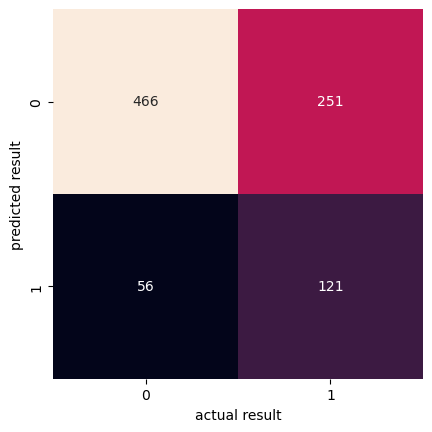

In [48]:
# Build a Confusion Matrix using test data
mat2 = confusion_matrix(prediction2, y_test)
sns.heatmap(mat2, square= True, fmt = 'g', annot=True, cbar = False)
plt.xlabel('actual result')
plt.ylabel('predicted result')
a,b = plt.ylim()
plt.show()

### Step - VIII: Accuracy Rate, Specificity, Precision, Sensitivity (Recall), Balanced Accuracy

> **💡Solution💡-**
>
> **Accuracy Rate** 
>From the confusion matrix above, we can see that there were 56 times in which the model predicted that the no of visitors would prefer passive events and visitors did prefer the passive events. In addition there were 466 times in which the model correctly predicted visitors prefer interactive events. We can take those 587 (466+121) times, and divide by the total size of the training set (894) to get the 65.65% oveall accuracy.
>
>This means that the model's predictions are accurate for about 2/3rd of the cases in the test dataset, providing a reasonalble level of predictive performance

In [49]:
# Total number of observations
total_logmodel_matrix= sum(sum(mat2))
total_logmodel_matrix

# From confusion matrix calculate accuracy
# accuracy = (TP + TN)/ (TP+FP+FN+TN)

accuracy_logmodel = (mat2[1,1] + mat2[0,0])/total_logmodel_matrix
print('The logistic regression model has an accuracy of :', accuracy_logmodel)

The logistic regression model has an accuracy of : 0.656599552572707


In [50]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       522
           1       0.68      0.33      0.44       372

    accuracy                           0.66       894
   macro avg       0.67      0.61      0.60       894
weighted avg       0.66      0.66      0.62       894



In [52]:
# Given values
TP = 466
TN = 121
FP = 251
FN = 56

# Specificity
specificity = TN / (TN + FP)
print('Specificity (True Negative Rate):', specificity)

# Precision
precision = TP / (TP + FP)
print('Precision:', precision)

# Sensitivity (Recall)
sensitivity = TP / (TP + FN)
print('Sensitivity:', sensitivity)

# Balanced Accuracy
balanced_accuracy = (sensitivity + specificity) / 2
print('Balanced Accuracy:', balanced_accuracy)


Specificity (True Negative Rate): 0.32526881720430106
Precision: 0.6499302649930265
Sensitivity: 0.89272030651341
Balanced Accuracy: 0.6089945618588555


- **Specificity (True Negative Rate):** Specificity measures the proportion of actual negative instances (passive event preferences) that were correctly identified by the model. A specificity of 0.3253 indicates that approximately 32.53% of visitors who actually prefer passive events were correctly identified by the model as preferring passive events.
- **Precision (Positive Predictive Value):** Precision measures the proportion of correctly identified positive predictions (interactive event preferences) out of all positive predictions made by the model. A precision of 0.6499 indicates that approximately 64.99% of the visitors predicted by the model as preferring interactive events indeed prefer interactive events.
- **Sensitivity (True Positive Rate or Recall):**  Sensitivity, also known as Recall or True Positive Rate, measures the proportion of actual positive instances (interactive event preferences) that were correctly identified by the model. A sensitivity of 0.8927 indicates that approximately 89.27% of visitors who actually prefer interactive events were correctly identified by the model as preferring interactive events.
- **Balanced Accuracy:** Balanced Accuracy is the average of sensitivity and specificity, providing a balanced evaluation of the model's performance across both classes. A balanced accuracy of 0.6090 indicates that the model achieves an average accuracy of approximately 60.90% across both positive and negative classes, considering both true positive and true negative rates.

Overall, the logistic regression model demonstrates promising performance in predicting visitor preferences for interactive or passive events, with a sensitivity of approximately 89.27%, indicating its ability to accurately identify visitors who prefer interactive events. However, there is room for improvement in specificity, which stands at around 32.53%, suggesting that the model could better identify visitors who prefer passive events. The model achieves a precision of approximately 64.99%, indicating its capability to accurately classify visitors as preferring interactive events out of all positive predictions. With a balanced accuracy of approximately 60.90%, the model provides a balanced assessment of its overall performance across both classes, underscoring its potential for effective event planning and marketing strategies tailored to visitor characteristics.

### Step - VIII: Accuracy Rate Comparison Training Set vs. Test Set

In [61]:
accuracy_score(y_train,  prediction1)

0.6634328358208955

In [62]:
accuracy_score(y_test, prediction2)

0.656599552572707

> **💡Interpretation💡-**
>
> The accuracy score for the training set is approximately 66.34% indicating that the logistic tegression model correctly predicts around 66.34% of visitor preferences for interactive or passive events within the training set. Similarly, the accuracy score for the test set is approximately 65.66%, suggesting that the model accurately predicts around 65% of visitor preferences for interactive or passive events within the test dataset. These accuracy score demonstrate the model's ability to make reasonably accurate predictions on both the training and test datasets, highlighting it's effectiveness in classifying visitor preferences for event planning and marketing strategies.

### Step - IX: Predicting for hypithetical visitors

In [74]:
# New hypothetical visitor named Tina
df3 = pd.DataFrame({
    'age': [28],
    'travel_dist': [50],
    'gender_Male': [0],
    'homestate_Maine': [1],
    'homestate_Massachusetts': [0],
    'homestate_New Hampshire': [0],
    'homestate_New Jersey': [0],
    'homestate_New York': [0],
    'homestate_Ontario': [0],
    'homestate_Quebec': [0],
    'homestate_Rhode Island': [0],
    'homestate_Unknown': [0],
    'homestate_Vermont': [0],
    'phys_level_Sedentary': [0],
    'phys_level_Very Active': [1],
    'companion_type_Friends': [1],
    'companion_type_Solo': [0]
})

In [75]:
#Predict using the trained logistic regression model
predicted_interactive = logmodel.predict(df3)
probability_interactive = logmodel.predict_proba(df3)[:,1]

In [76]:
# Print the prediction and probability
if predicted_interactive[0] == 0:
    print("Prediction: The visitor will prefer interactive events.")
else:
    print("Prediction: The visitor will prefer passive events.")

print("Probability of the visitor will prefer interactive events:", probability_interactive[0])

Prediction: The visitor will prefer interactive events.
Probability of the visitor will prefer interactive events: 0.3779662697715343


> **💡Interpretations💡-**
>
>Based on the logistic regression model, Tina is predicted to prefer interactive events. However, the predicted probability is 0.377, which is closer to a random guess (0.5) than a strong prediction.
>
>Prediction: Interactive Events (class label 0)
>
>Confidence: Low (probability of 0.377 indicates the model is unsure)
>
>This suggests that while the model leans towards Tina preferring interactive events, there isn't a strong signal. It's possible Tina might also enjoy passive events.

In [70]:
# Dataframe with numeric predictor variables Employee named - Sam
df4 = pd.DataFrame({
    'age': [18],
    'travel_dist': [500],
    'gender_Male': [1],
    'homestate_Maine': [0],
    'homestate_Massachusetts': [0],
    'homestate_New Hampshire': [0],
    'homestate_New Jersey': [0],
    'homestate_New York': [0],
    'homestate_Ontario': [0],
    'homestate_Quebec': [0],
    'homestate_Rhode Island': [0],
    'homestate_Unknown': [0],
    'homestate_Vermont': [0],
    'phys_level_Sedentary': [1],
    'phys_level_Very Active': [0],
    'companion_type_Friends': [0],
    'companion_type_Solo': [1]
})

In [72]:
predicted_interactive2 = logmodel.predict(df4)
probability_interactive2 =  logmodel.predict_proba(df4)[:,1]

In [73]:
# Print the prediction and probability
if predicted_interactive2[0] == 0:
    print("Prediction: The visitor will prefer interactive events.")
else:
    print("Prediction: The visitor will prefer passive events.")

print("Probability of the visitor will prefer interactive events:", probability_interactive2[0])

Prediction: The visitor will prefer interactive events.
Probability of the visitor will prefer interactive events: 0.30558518845847765


> **💡Solution💡-**
>
>Sam is also predicted to prefer interactive events. However, similar to Tina, the predicted probability is 0.306, which is again closer to a random guess than a strong prediction.
>
>Prediction: Interactive Events (class label 0)
>
>Confidence: Low (probability of 0.306 indicates the model is unsure)
>
>This result suggests that the model is unsure about Sam's preference. While it leans slightly towards Sam preferring interactive events, the probability is weak. There's a chance Sam might also enjoy passive events. The model might be unsure because Sam is quite young but is travelling alone. He seems like a loner. He is travelling very far from NewYork to Maine. Sam is also not very active. 

**💡Conclusion💡-**

Challenge: This part of the report explores how a  logistic regression model, leveraging visitor data,  improved event planning and marketing strategies.
Predictive Power and Visitor Targeting:

The model demonstrates a strong ability to identify visitors who prefer interactive events (89.27% sensitivity). This allows park managers to target these visitors with focused promotions for interactive events, potentially increasing attendance and engagement.
While specificity for identifying passive event preferences is lower (32.53%), the model still offers some predictive power. Further data collection or model refinement can improve targeting accuracy for passive events.

Traditionally, event planning relied on demographics like age and location. This model highlights the importance of considering additional visitor characteristics. Travel distance, physical activity level, and companion type all seem to influence event preference.
Park managers can leverage this by creating targeted marketing campaigns based on these characteristics. For instance, promoting high-energy events to visitors traveling long distances or those preferring solo adventures (predicted to prefer interactive events).

The model's accuracy (around 66%) indicates potential for improvement. Including more visitor data points (e.g., social media activity, interests) or exploring different machine learning algorithms could enhance predictive power.
It's crucial to acknowledge that visitor preferences are subjective and influenced by various factors beyond the model's scope.

By implementing these takeaways, park managers can leverage the power of data and machine learning to create a more visitor-centric experience. This can lead to increased event attendance, visitor satisfaction, and overall park engagement.